Кирилл Лалаянц, R33352

# Лабораторная работа No2
## Переходные процессы, свободное движение, устойчивость

Импорт необходимых для работы библиотек. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import control 
import sympy
import os
import math

SAVE_PATH = 'tex-report/figs/'
os.makedirs(SAVE_PATH, exist_ok=True)

sympy.init_printing()

## Задание 1. Свободное движение.

In [2]:
p = sympy.Symbol("p")


def task1_output(m1, m2, initial_value, ts, plot_name, save_name):
    poly = sympy.simplify((p - m1) * (p - m2))
    coeffs = sympy.Poly(poly, p).all_coeffs()
    print(f'Polynom: {poly} = {poly.expand()}; coeffs = {coeffs}')
    
    ss = control.tf2ss(control.tf(1, np.array(coeffs, dtype=np.float64)))
    ss_reachable = control.canonical_form(ss, form="reachable")[0]
    print(f"SS: {ss_reachable}")

    tf2_y_0_0 = control.forced_response(ss_reachable, U=0, X0=[0, 0], T=ts)
    tf2_y_1_1 = control.forced_response(ss_reachable, U=0, X0=initial_value, T=ts)
    plot_task1(tf2_y_0_0, tf2_y_1_1, initial_value, ts, plot_name, save_name)
    

def plot_task1(tf2_y_0_0, tf2_y_1_1, initial_value, ts, plot_name, save_name):
    f_size = 40
    fig, axs = plt.subplots(1, 2, figsize=(25, 17))
    fig.suptitle(f"Задание 1. Свободное движение. \n {plot_name}", fontsize=f_size, y=1)

    axs[0].plot(ts, tf2_y_0_0.outputs, 'b', linewidth=8, label = 'y(0) = 0')
    axs[0].plot(ts, tf2_y_1_1.outputs, 'r--', linewidth=8, label = f'y(0) = {initial_value[1]}')
    axs[0].set_title(f"y = y(t)", fontsize=f_size)
    axs[0].set_xlabel(f"t, [c]", fontsize=f_size)
    axs[0].set_ylabel(f"y, [м]", fontsize=f_size)
    axs[0].grid(True)
    axs[0].legend(fontsize=f_size, title_fontsize=f_size, title="Начальные условия")
    
    axs[1].plot(ts, tf2_y_0_0.states[0], "b", linewidth=8, label = '$\dot{y}(0) = 0$')
    axs[1].plot(ts, tf2_y_1_1.states[0], "r--", linewidth=8, label = '$\dot{y}(0) = $' + f'{initial_value[0]}')
    axs[1].set_title(r"$\dot{y} = \dot{y}(t)$", fontsize=f_size)
    axs[1].set_xlabel(f"t, [c]", fontsize=f_size)
    axs[1].set_ylabel(r"$\dot{y}$, [м / с]", fontsize=f_size)
    axs[1].grid(True)
    axs[1].legend(fontsize=f_size, title_fontsize=f_size, title="Начальные условия")
    
    plt.savefig(f'{SAVE_PATH}/{save_name}')
    plt.show()
    

2. устойчивой и неустойчивой апериодическим модам;

Polynom: p**2 - 1 = p**2 - 1; coeffs = [1, 0, -1]
SS: A = [[-0.  1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-0.  1.]]

D = [[0.]]



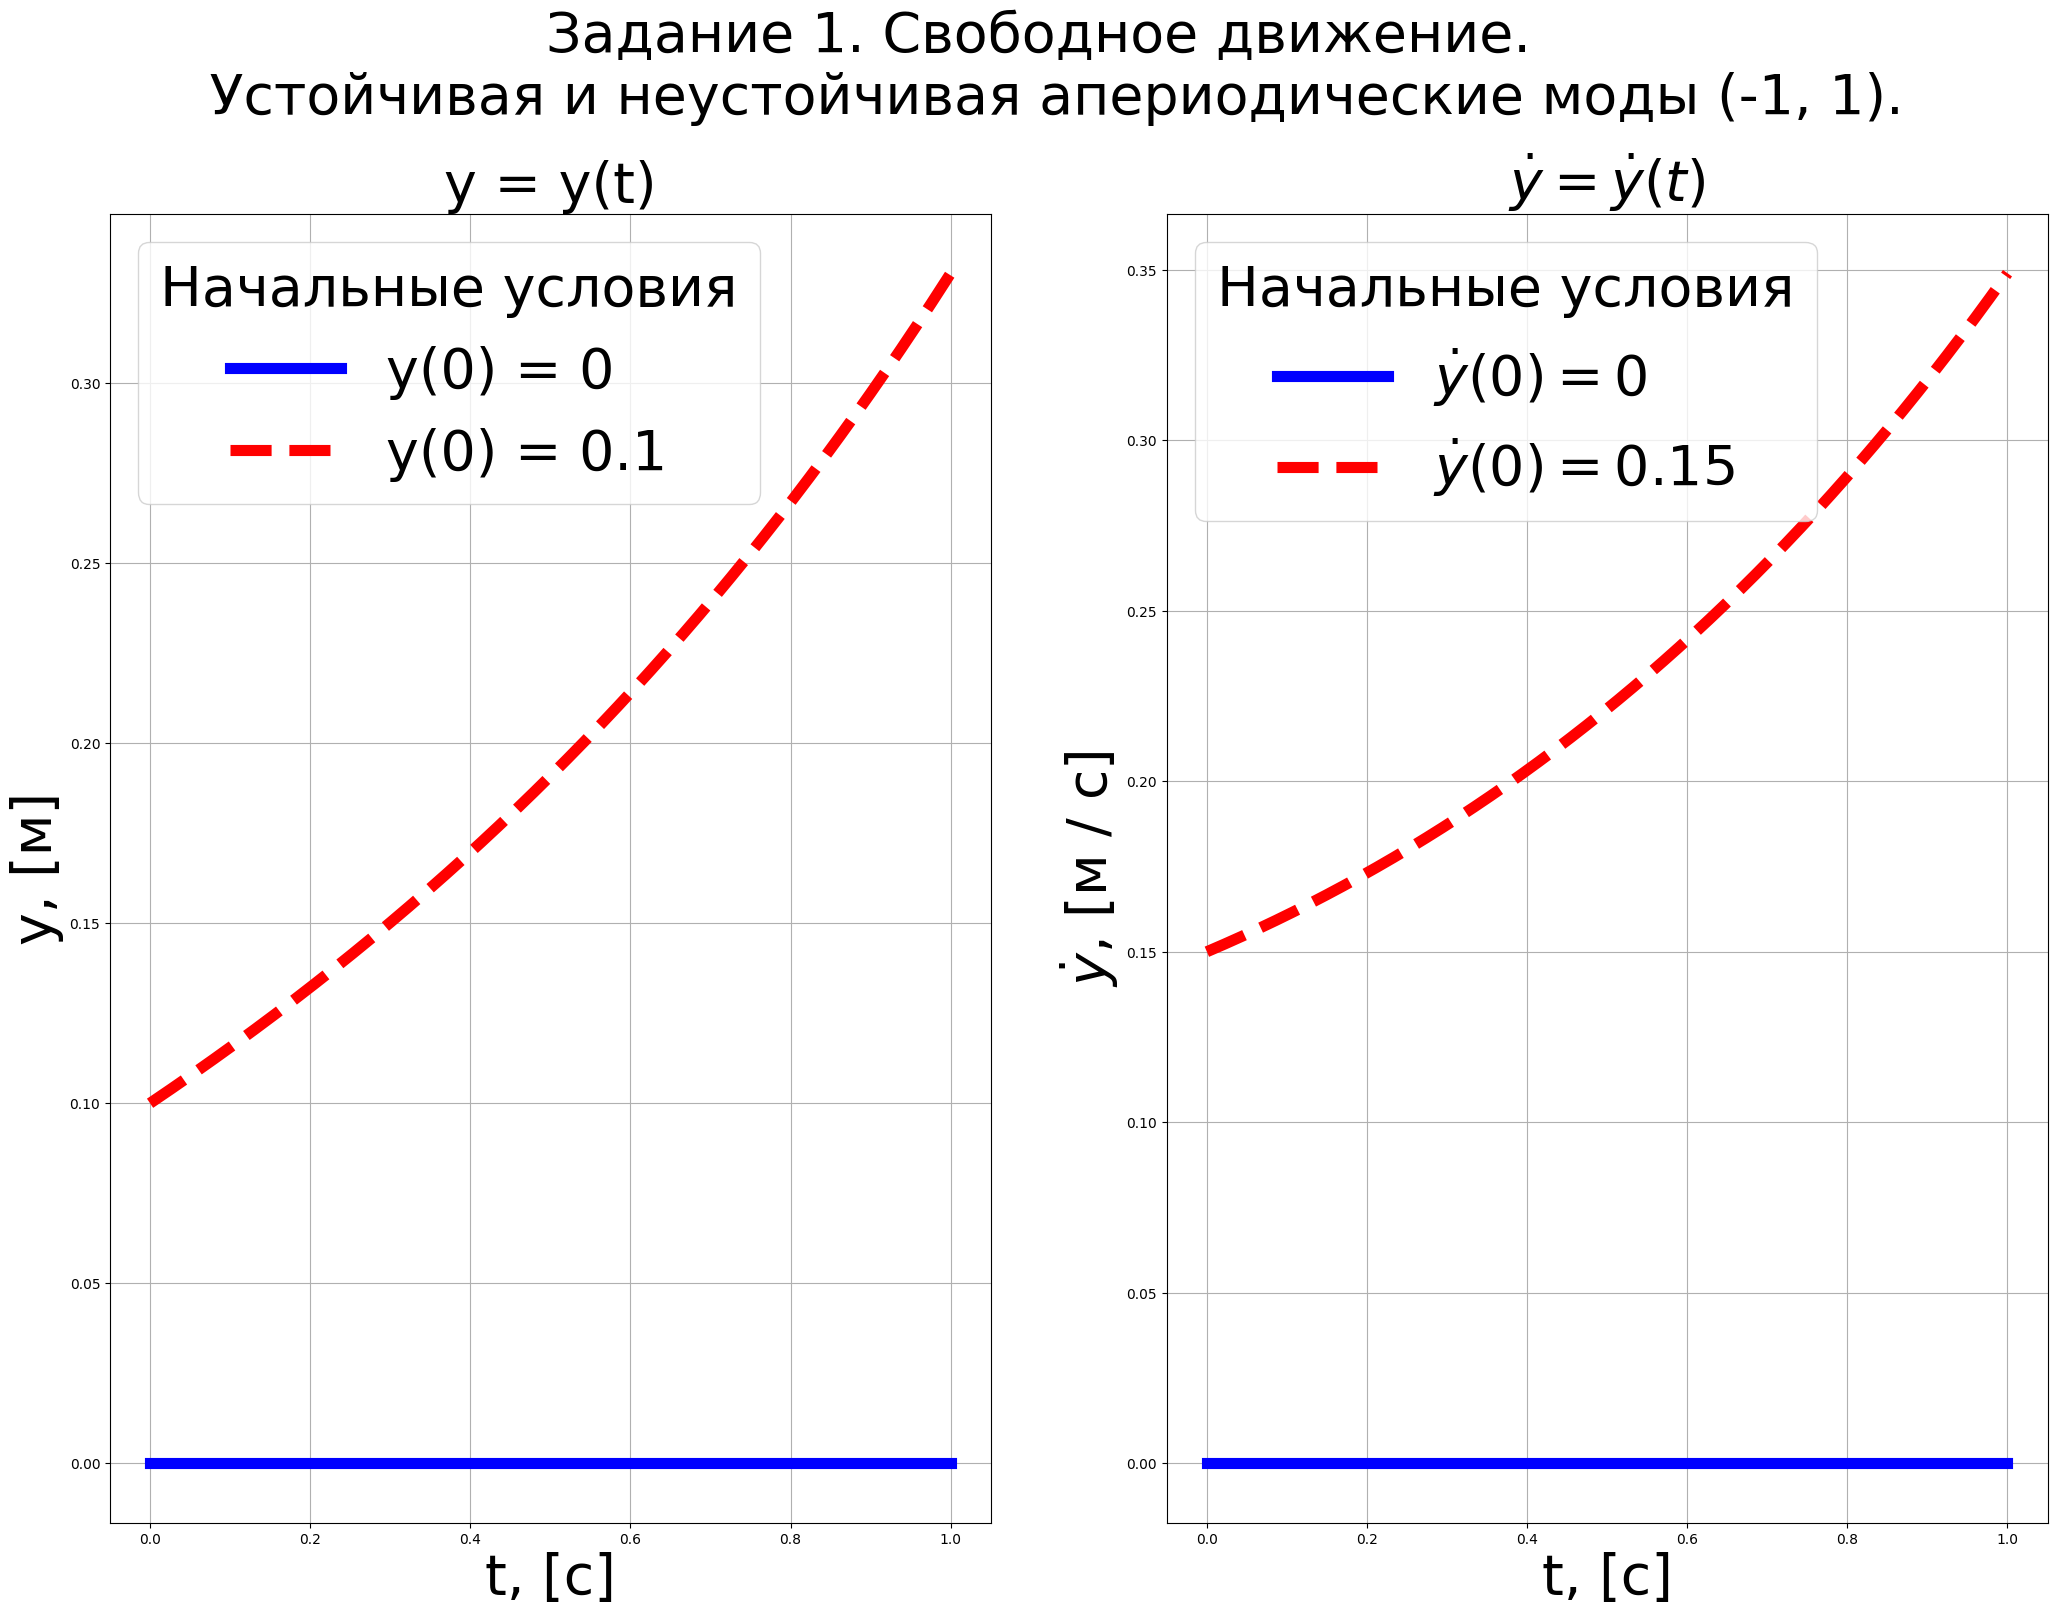

In [3]:
dt = 0.001 
max_t = 1 
ts = np.linspace(0, max_t, int(max_t / dt))

m20, m21 = -1, 1
initial_value = [0.15, 0.1]
task1_output(m20, m21, initial_value, ts, plot_name = f'Устойчивая и неустойчивая апериодические моды {m20, m21}.', save_name = 'task1_2.jpg')

4. нейтральной и неустойчивой апериодической модам;

Polynom: p*(p - 1) = p**2 - p; coeffs = [1, -1, 0]
SS: A = [[ 1. -0.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-0.  1.]]

D = [[0.]]



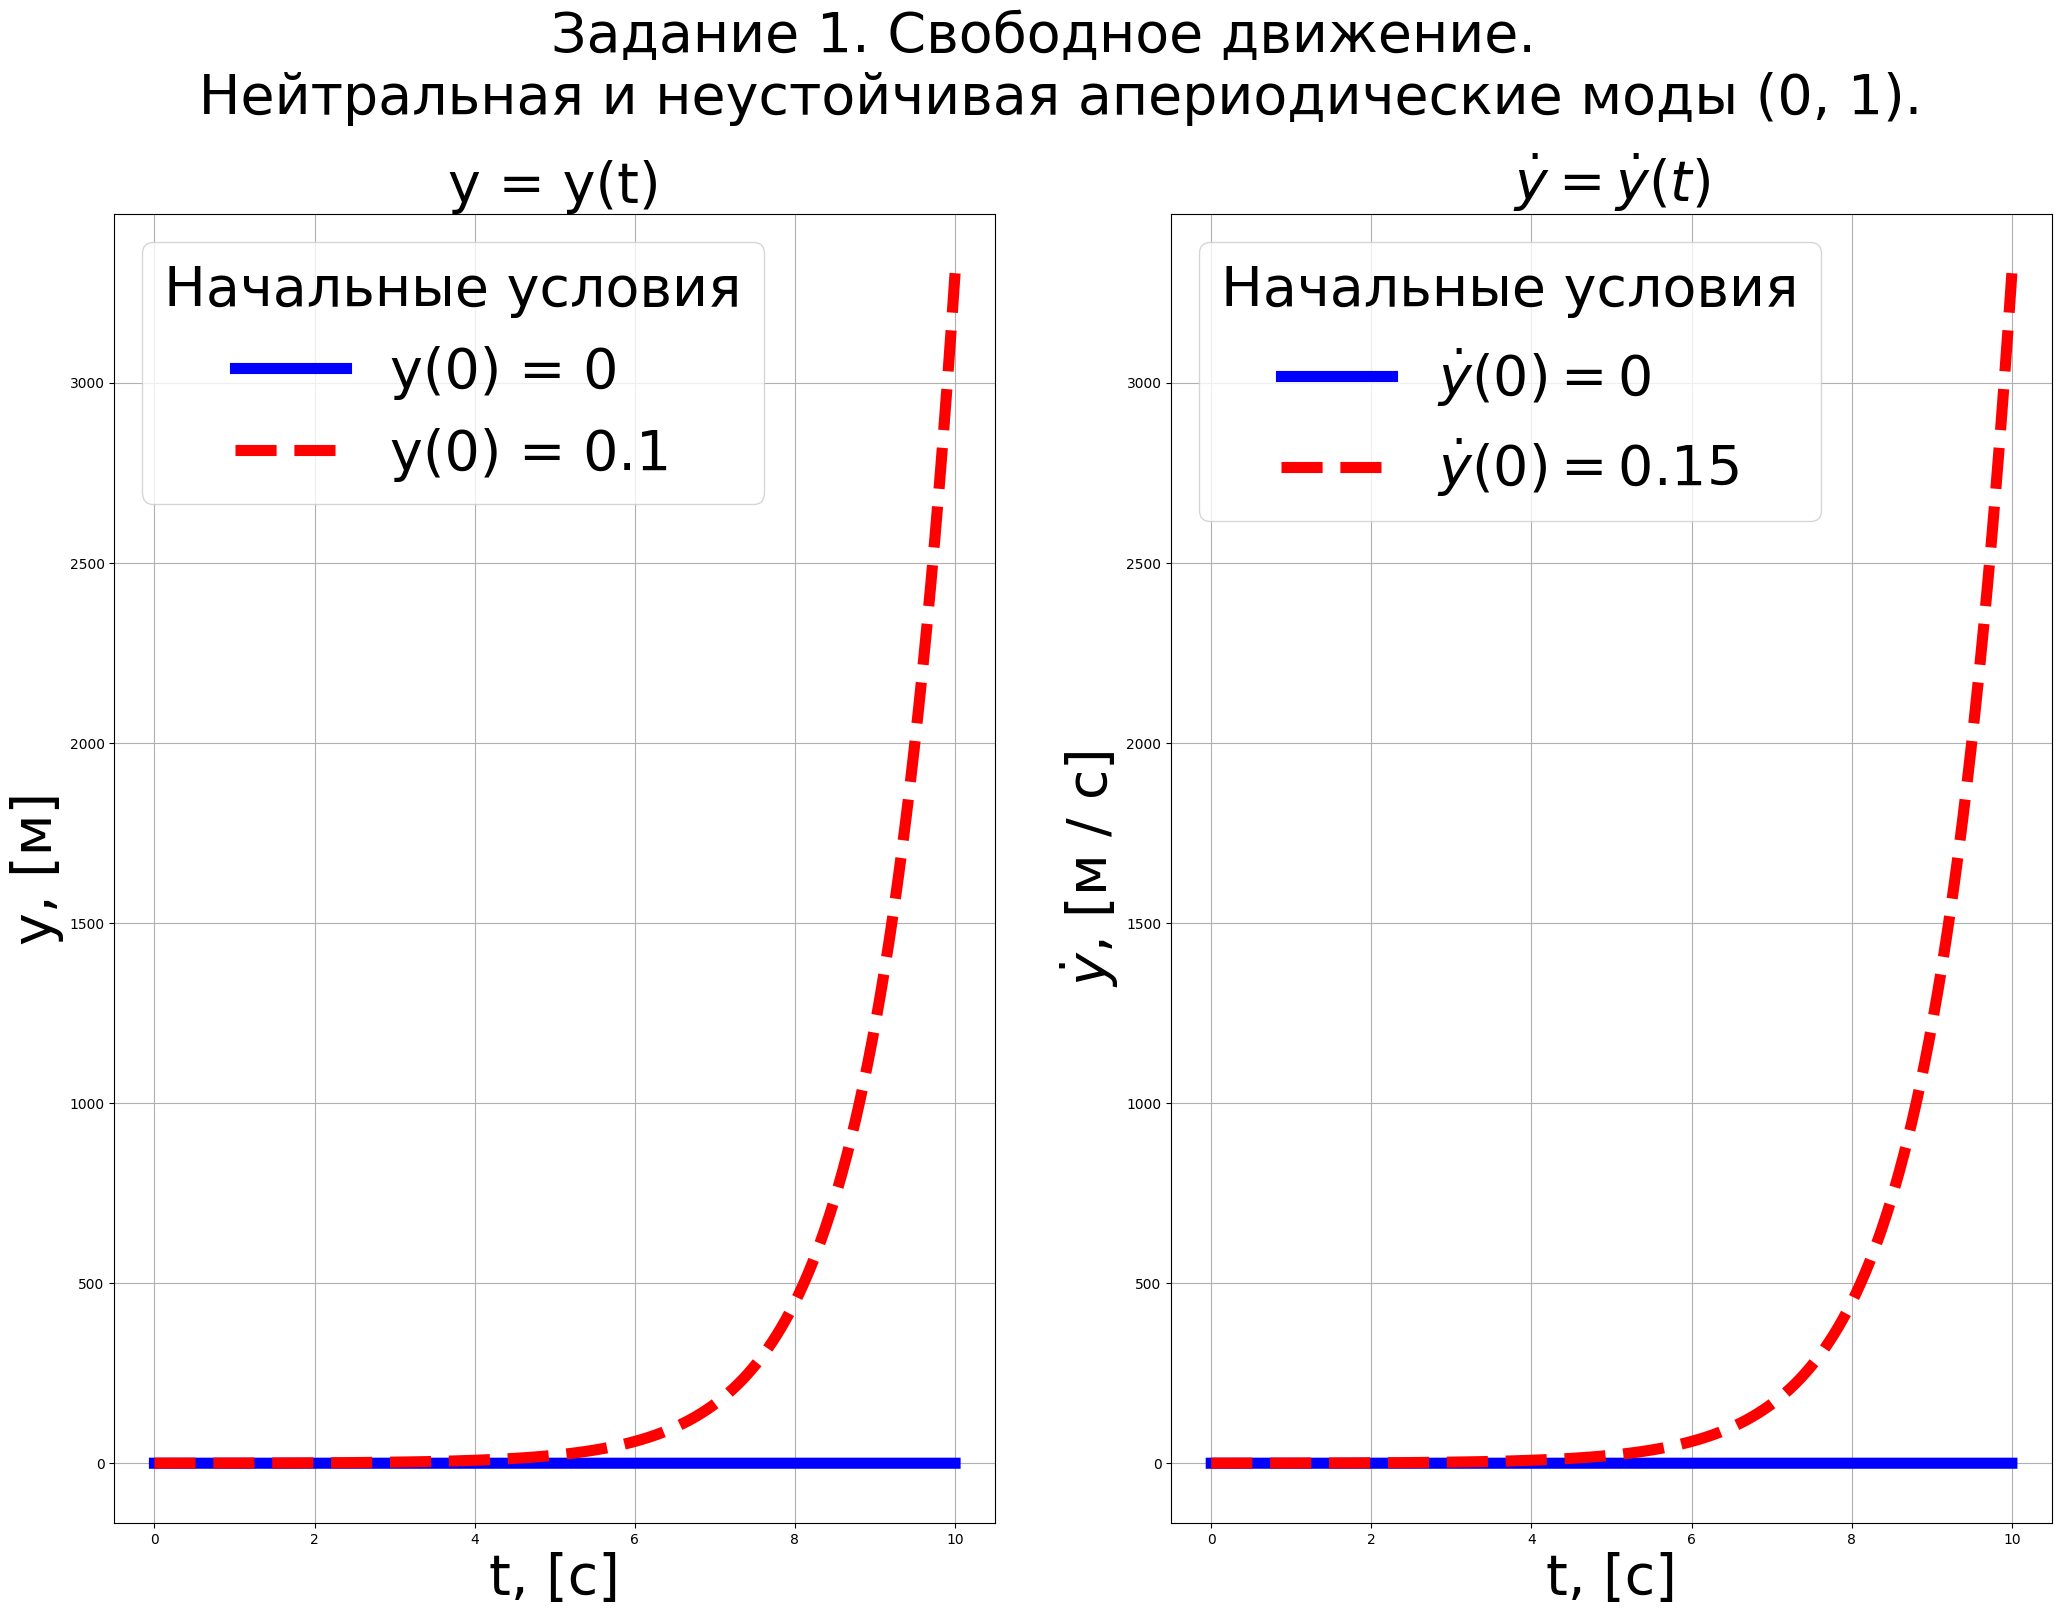

In [4]:
dt = 0.001 
max_t = 10
ts = np.linspace(0, max_t, int(max_t / dt))
m40, m41 = 0, 1

initial_value = [0.15, 0.1]
task1_output(m40, m41, initial_value, ts, plot_name = f'Нейтральная и неустойчивая апериодические моды {m40, m41}.', save_name = 'task1_4.jpg')

6. паре консервативных мод;

Polynom: p**2 + 1 = p**2 + 1; coeffs = [1, 0, 1]
SS: A = [[-0. -1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[-0.  1.]]

D = [[0.]]



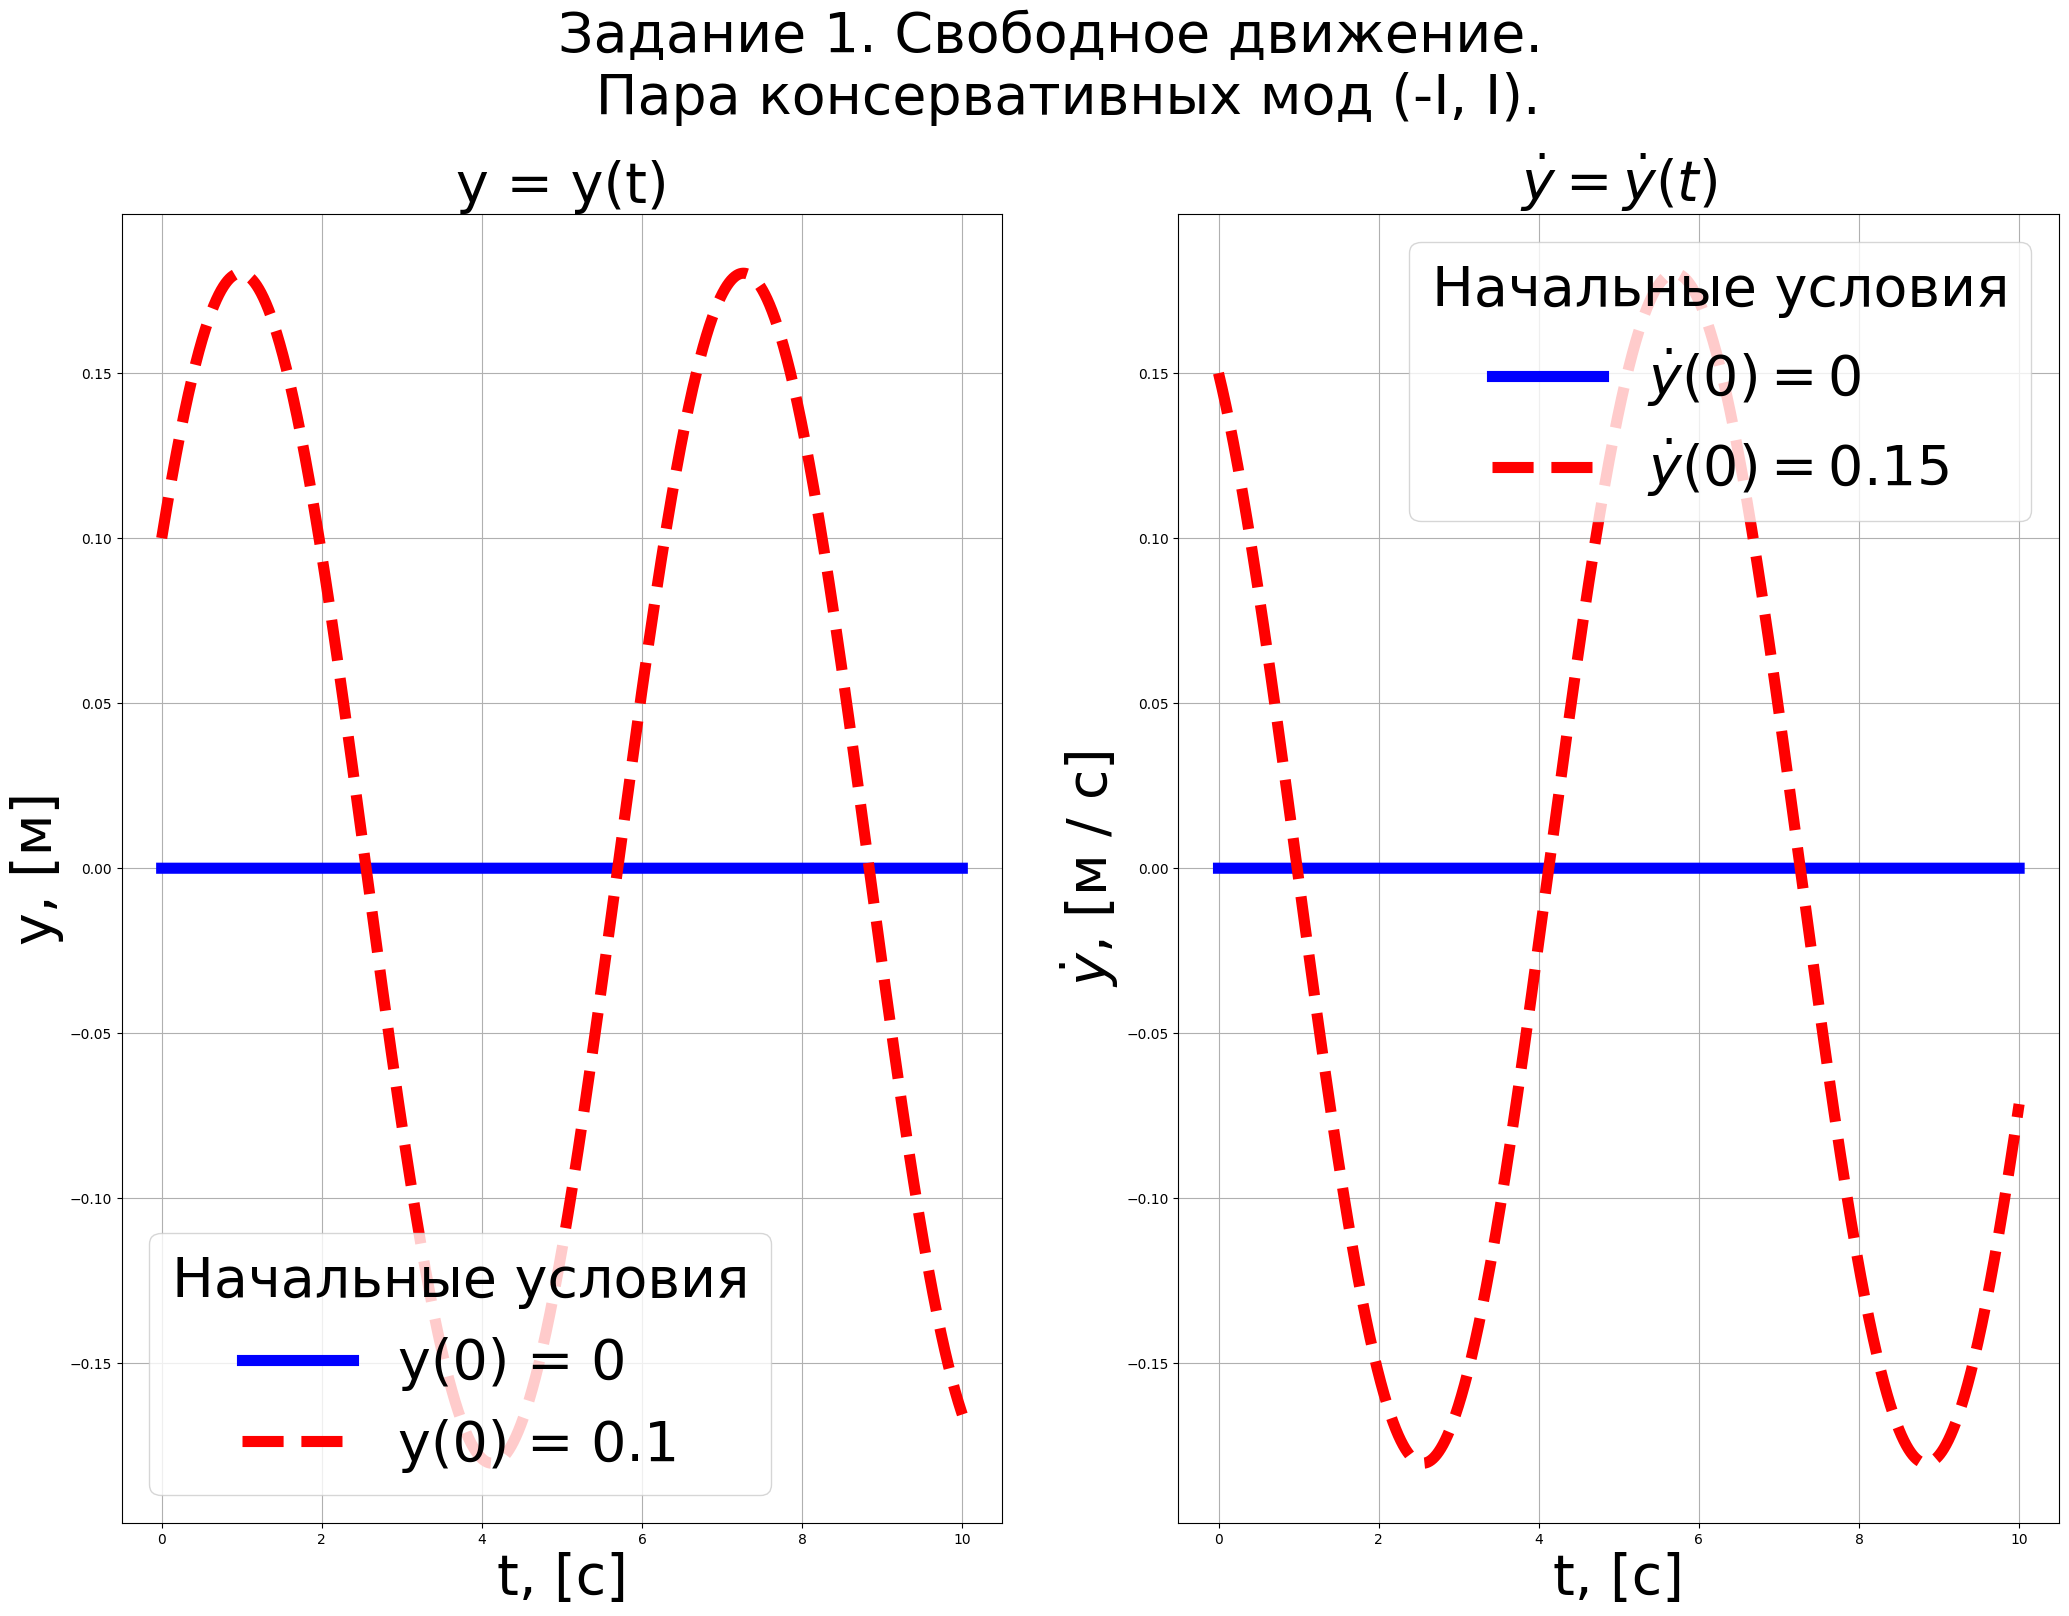

In [5]:
dt = 0.001 
max_t = 10
ts = np.linspace(0, max_t, int(max_t / dt))

m60, m61 = - sympy.I, sympy.I
initial_value = [0.15, 0.1]
task1_output(m60, m61, initial_value, ts, plot_name = f'Пара консервативных мод {m60, m61}.', save_name = 'task1_6.jpg')

## Задание 2. Область устойчивости.

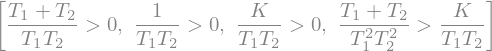

In [6]:
K, T1, T2 = sympy.symbols("K,T1,T2")
TF1s = 1/(p*T1 + 1)
TF2s = 1/(p*T2 + 1)
TF3s = 1 / p
T_mains = TF1s * TF2s * TF3s * K 
T_feedbacks = 1

Ts = T_mains / (1 + T_mains * T_feedbacks)
Ts = sympy.simplify(Ts).expand()
Ts_num, Ts_denum = sympy.fraction(Ts)
Ts_denum_coeffs = (sympy.Poly(Ts_denum/ (T1 * T2), p)).all_coeffs()
equations = [Ts_denum_coeffs[1] > 0, \
    Ts_denum_coeffs[2] > 0, \
    Ts_denum_coeffs[3] > 0, \
    Ts_denum_coeffs[1] * Ts_denum_coeffs[2] > Ts_denum_coeffs[3]]
equations

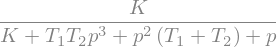

In [7]:
sympy.collect(Ts, p)

T2 = -1 \
solve -(-1+x)/x > 0 and 1/-x > 0 and y/-x > 0 and (-1 + x) / -x > y

In [8]:
# Решений нет!

T1 = 1 \
solve (1+x)/x > 0 and 1/x > 0 and y/x > 0 and (1 + x) / x > y

/var/folders/dj/d737lw992sd7ff5_jq6k5c240000gn/T/ipykernel_45278/3161783768.py:2: RuntimeWarning: divide by zero encountered in divide
  K = (T2 + 1) / T2


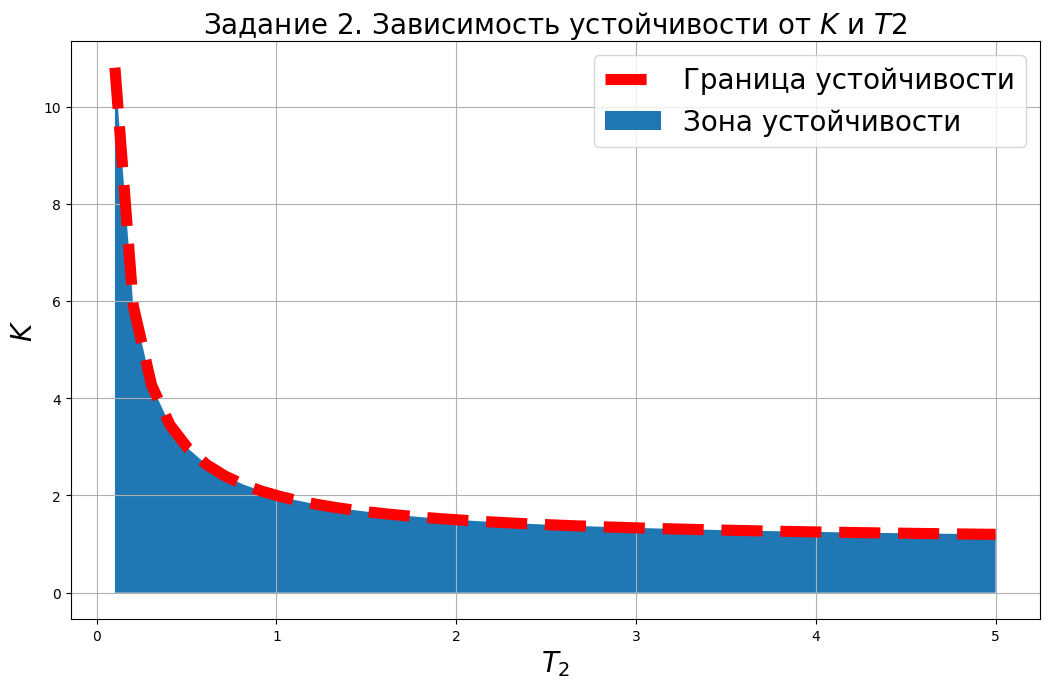

In [9]:
T2 = np.linspace(0, 5)
K = (T2 + 1) / T2

plt.figure(figsize=(12.5, 7.5))
plt.plot(T2, K, 'r--', linewidth=8, label = 'Граница устойчивости')
plt.fill_between(T2, K, 0, label = 'Зона устойчивости')
plt.title("Задание 2. Зависимость устойчивости от $K$ и $T2$", fontsize=20)
plt.xlabel("$T_2$", fontsize=20)
plt.ylabel("$K$", fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.savefig(f'{SAVE_PATH}/task2_T2_K.jpg')

In [10]:
def task2_get_TF(T1, T2, K):
    TF1 = control.tf([1], [T1, 1])
    TF2 = control.tf([1], [T2, 1])
    TF3 = control.tf([1], [1, 0])

    TF_main = K * TF1 * TF2 * TF3
    TF_feedback = control.tf([1], [1])

    ss = control.tf2ss(control.feedback(TF_main, TF_feedback))
    ss_reachable = control.canonical_form(ss, form="reachable")[0]
    
    return ss_reachable

def task2_show_TF(T1, T2, K, save_name, plot_name, ts, U = 1, initial_value=[0, 0, 0]):
    tf_y = control.forced_response(task2_get_TF(T1, T2, K), U=U, X0=[1, 1, 1], T=ts).outputs
    plt.figure(figsize=(12.5, 7.5))
    plt.plot(ts, tf_y, linewidth=8, label = 'Результат моделирования')
    plt.title(plot_name, fontsize=20)
    plt.xlabel("$t, [c]$", fontsize=20)
    plt.ylabel("y", fontsize=20)
    plt.grid(True)
    plt.legend(fontsize=20)
    plt.savefig(f'{SAVE_PATH}/{save_name}')
    plt.show()

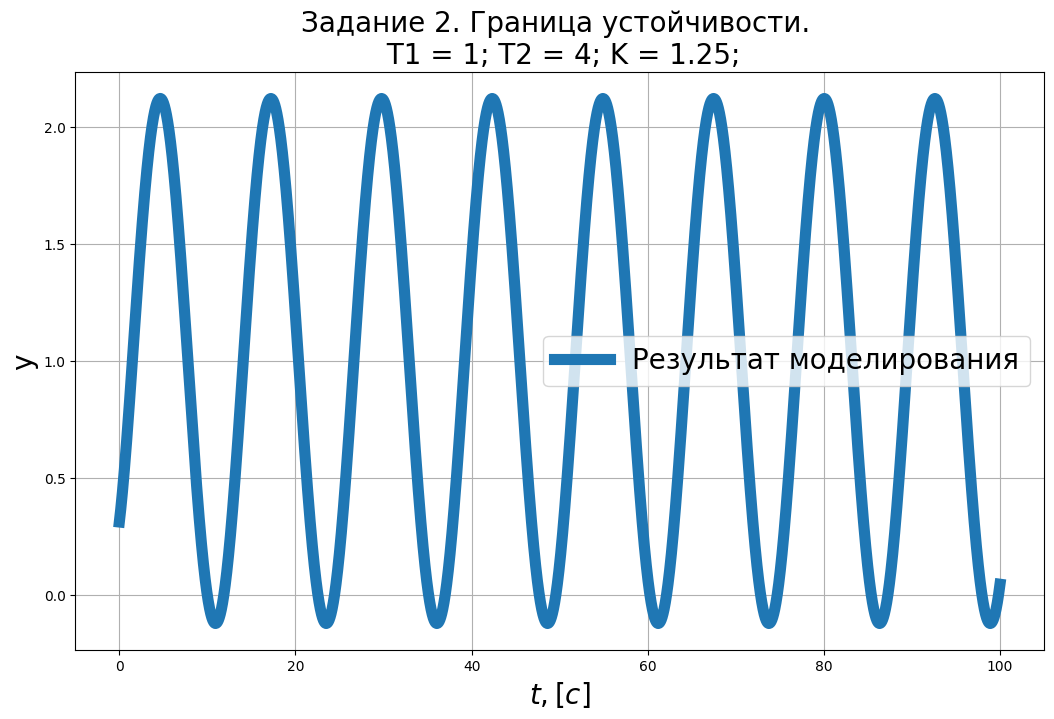

In [11]:
dt = 0.001 
max_t = 100
ts = np.linspace(0, max_t, int(max_t / dt))
T1, T2 = 1, 4
K = 1.25

task2_show_TF(T1, T2, K, "task2_conservative.jpg", f"Задание 2. Граница устойчивости. \n T1 = {T1}; T2 = {T2}; K = {K};", ts, U = 1, initial_value=[0, 0, 0])

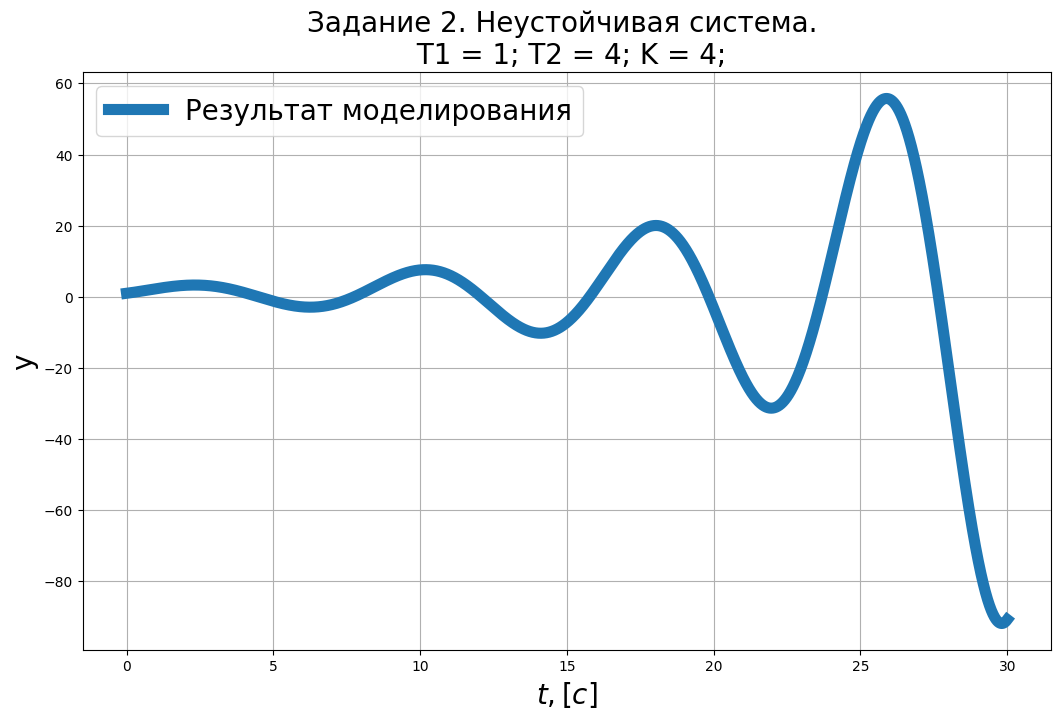

In [12]:
dt = 0.001 
max_t = 30
ts = np.linspace(0, max_t, int(max_t / dt))
T1, T2 = 1, 4
K = 4

task2_show_TF(T1, T2, K, "task2_not_stable.jpg", f"Задание 2. Неустойчивая система. \n T1 = {T1}; T2 = {T2}; K = {K};", ts, U = 1, initial_value=[0, 0, 0])

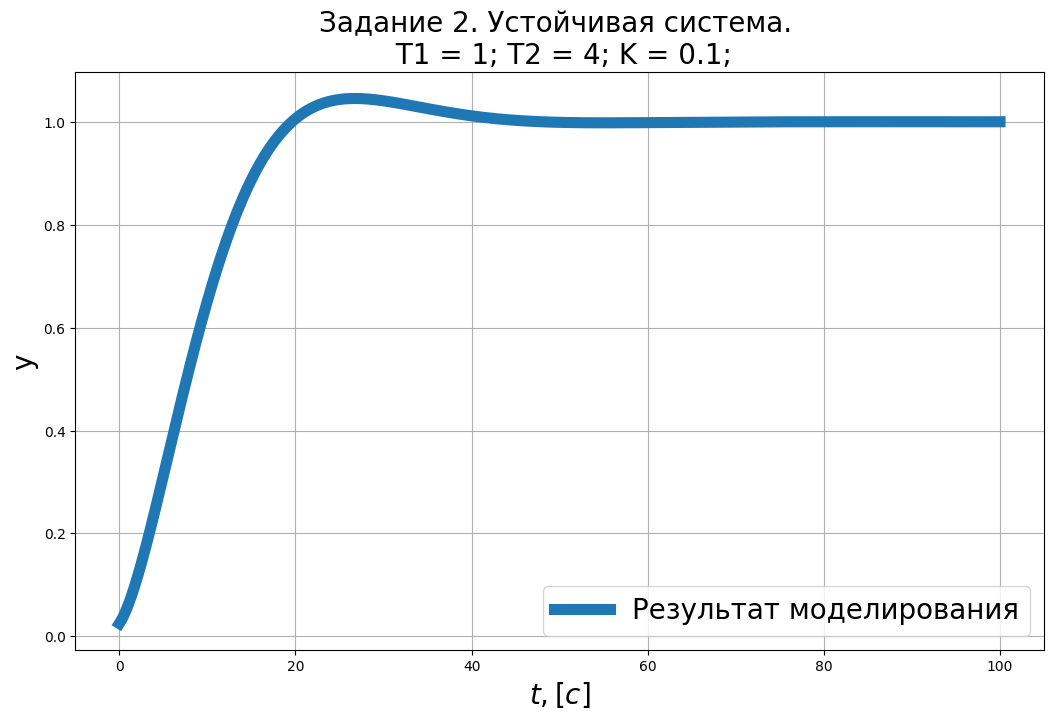

In [13]:
dt = 0.001 
max_t = 100
ts = np.linspace(0, max_t, int(max_t / dt))
T1, T2 = 1, 4
K = 0.1

task2_show_TF(T1, T2, K, "task2_stable.jpg", f"Задание 2. Устойчивая система. \n T1 = {T1}; T2 = {T2}; K = {K};", ts, U = 1, initial_value=[0, 0, 0])

## Задание 3. Автономный генератор.

In [14]:
task3_f = lambda x: np.cos(5*x) + np.exp(x) + np.exp(-5 * x)

In [15]:
task3_A = np.array([[1, 0, 0, 0], [0, -5, 0, 0], [0, 0, 0, 5], [0, 0, -5, 0]])
t = sympy.symbols("t")
power = 1
task3_dummy = np.zeros_like(task3_A) * t
for power in range(5):
    tmp = np.linalg.matrix_power(task3_A, power) * t**power / math.factorial(power)
    task3_dummy += tmp
    # print(sympy.printing.latex(np.linalg.matrix_power(task3_A, power) * t**power / math.factorial(power)))
    print(tmp)
task3_dummy  

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
[[t 0 0 0]
 [0 -5*t 0 0]
 [0 0 0 5*t]
 [0 0 -5*t 0]]
[[t**2/2 0 0 0]
 [0 25*t**2/2 0 0]
 [0 0 -25*t**2/2 0]
 [0 0 0 -25*t**2/2]]
[[t**3/6 0 0 0]
 [0 -125*t**3/6 0 0]
 [0 0 0 -125*t**3/6]
 [0 0 125*t**3/6 0]]
[[t**4/24 0 0 0]
 [0 625*t**4/24 0 0]
 [0 0 625*t**4/24 0]
 [0 0 0 625*t**4/24]]


array([[t**4/24 + t**3/6 + t**2/2 + t + 1, 0, 0, 0],
       [0, 625*t**4/24 - 125*t**3/6 + 25*t**2/2 - 5*t + 1, 0, 0],
       [0, 0, 625*t**4/24 - 25*t**2/2 + 1, -125*t**3/6 + 5*t],
       [0, 0, 125*t**3/6 - 5*t, 625*t**4/24 - 25*t**2/2 + 1]],
      dtype=object)

In [16]:
print(sympy.printing.latex(np.linalg.matrix_power(task3_A, power) * t**power / math.factorial(power)))


\mathtt{\text{[[t**4/24 0 0 0]
 [0 625*t**4/24 0 0]
 [0 0 625*t**4/24 0]
 [0 0 0 625*t**4/24]]}}


In [17]:
task3_system_dummy= np.array([[sympy.exp(t), 0, 0, 0], \
    [0, sympy.exp(-5*t), 0, 0], \
    [0, 0, sympy.cos(5*t), sympy.sin(5*t)], \
    [0, 0, -sympy.sin(5*t), sympy.cos(5*t)]])
task3_system_dummy

array([[exp(t), 0, 0, 0],
       [0, exp(-5*t), 0, 0],
       [0, 0, cos(5*t), sin(5*t)],
       [0, 0, -sin(5*t), cos(5*t)]], dtype=object)

In [18]:
a1, a2, a3, a4 = sympy.symbols("a1 a2 a3 a4")
task3_initial_dummy = np.array([[a1], [a2], [a3], [a4]])
task3_system_dummy @ task3_initial_dummy

array([[a1*exp(t)],
       [a2*exp(-5*t)],
       [a3*cos(5*t) + a4*sin(5*t)],
       [-a3*sin(5*t) + a4*cos(5*t)]], dtype=object)

In [19]:
c1, c2, c3, c4 = sympy.symbols("c1 c2 c3 c4")
task3_C_dummy = np.array([c1, c2, c3, c4])
task3_final = (task3_C_dummy @ task3_system_dummy @ task3_initial_dummy)[0].expand()
type(task3_final)
sympy.collect(task3_final, [sympy.sin(5 * t), sympy.cos(5 * t)])

In [20]:
task3_analitical = task3_final.subs({a1: 1, a2: 1, a3: 1, a4: 1, c1: 1, c2: 1, c3: 0.5, c4: 0.5})
task3_analitical

In [21]:
task3_initial = np.ones((4, 1))
task3_C = np.array([1, 1, 0.5, 0.5])
task3_A, task3_initial, task3_C

(array([[ 1,  0,  0,  0],
        [ 0, -5,  0,  0],
        [ 0,  0,  0,  5],
        [ 0,  0, -5,  0]]),
 array([[1.],
        [1.],
        [1.],
        [1.]]),
 array([1. , 1. , 0.5, 0.5]))

In [22]:
task3_ss = control.ss(task3_A, np.zeros((4, 1)), task3_C, 0)

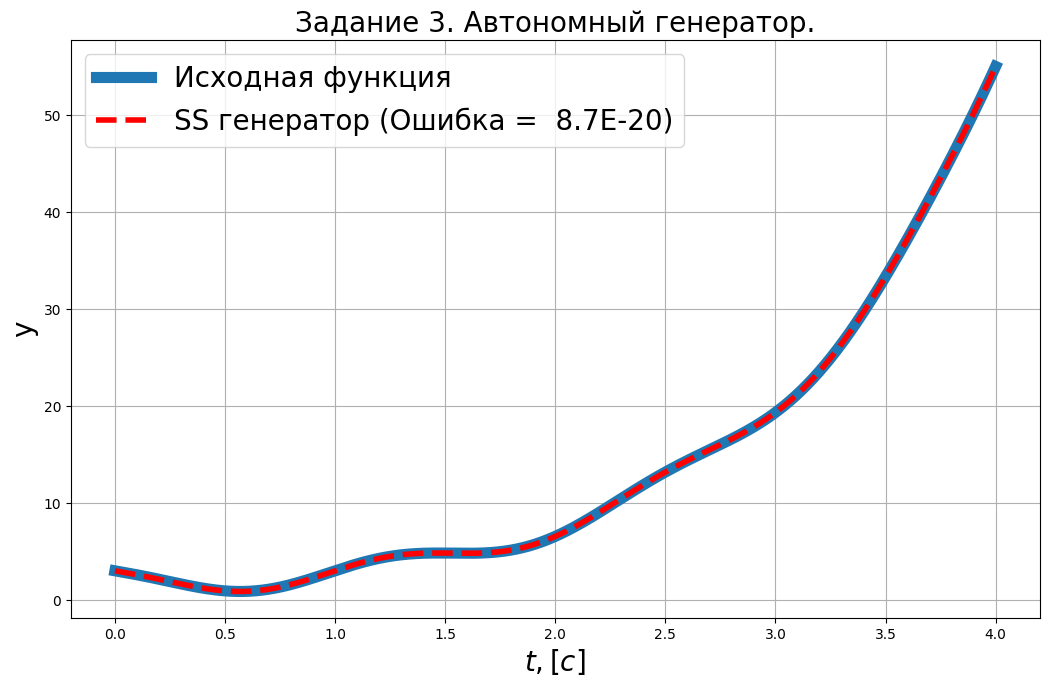

In [23]:
dt = 0.001
max_t = 4
ts = np.linspace(0, max_t, int(max_t / dt))

ss_response = control.forced_response(task3_ss, ts, X0=task3_initial)
task3_f_y = task3_f(ts)


plt.figure(figsize=(12.5, 7.5))
plt.plot(ts, task3_f_y, linewidth=8, label='Исходная функция')
plt.plot(ts, ss_response.outputs, 'r--', linewidth=4, label=f'SS генератор (Ошибка = {np.sum((task3_f_y- ss_response.outputs)**2) : .1E})')

plt.title('Задание 3. Автономный генератор.', fontsize=20)
plt.xlabel("$t, [c]$", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.savefig(f'{SAVE_PATH}/task3.jpg')
plt.show()

## Задание 4. (Необязательное) Изучение канонической управляемой формы: фазовые портреты.

In [24]:
def task4_output(m1, m2, initial_values, ts):
    plot_name = f'Моды: {m1, m2}'
    save_name = f'task4_{m1}_{m2}.jpg'
    poly = sympy.simplify((p - m1) * (p - m2))
    coeffs = sympy.Poly(poly, p).all_coeffs()
    tf_y = control.tf(1, np.array(coeffs, dtype=np.float64))
    tf_dy = tf_y * control.tf([1, 0], [1]) 
    ss = control.tf2ss(tf_dy)
    ss_reachable = control.canonical_form(ss, form="reachable")[0]
    
    ss = control.tf2ss(tf_y)
    ss_reachable = control.canonical_form(ss, form="reachable")[0]

    responses = []
    for initial_value in initial_values:
        tf_y_response = control.forced_response(tf_y, U=0, X0=initial_value, T=ts)
        tf_dy_response = control.forced_response(tf_dy, U=0, X0=initial_value, T=ts)
        ss_response = control.forced_response(ss_reachable, U=0, X0=initial_value, T=ts)
        responses.append([initial_value, tf_y_response, tf_dy_response, ss_response])
    
    task4_plot(responses, plot_name, save_name)

def task4_plot(responses, plot_name, save_name):
    f_size = 40
    fig, axs = plt.subplots(1, 3, figsize=(35, 15))
    fig.suptitle(f'Задание 4.(Необязательное) Изучение канонической управляемой формы: фазовые портреты. \n {plot_name}', fontsize=f_size, y=1)
    
    for indx, (initial_value, tf_y_response, tf_dy_response, ss_response) in enumerate(responses):
        axs[indx].plot(ss_response.states[1], ss_response.states[0], 'b', linewidth=8, label = '$x_2 = x_2(x_1)$')
        axs[indx].plot(-tf_y_response.outputs, -tf_dy_response.outputs, 'r--', linewidth=6, label = '$\dot{y} = \dot{y}(y)$')
        axs[indx].plot(initial_value[1], initial_value[0], 'go', markersize=f_size, label = 'Начальные условия')
        axs[indx].set_title(f"Начальные условия: {initial_value[::-1]}", fontsize=f_size)
        axs[indx].set_xlabel("y or $x_1$", fontsize=f_size)
        axs[indx].set_ylabel("$\dot{y}$ or $x_2$", fontsize=f_size)
        axs[indx].grid(True)
        axs[indx].legend(fontsize=f_size//20* 15)
    
    plt.savefig(f'{SAVE_PATH}/{save_name}')
    plt.show()

/Users/lalayants/.pyenv/versions/3.10.9/envs/control-theory-itmo/lib/python3.10/site-packages/control/timeresp.py:946: UserWarning: Non-zero initial condition given for transfer function system. Internal conversion to state space used; may not be consistent with given X0.
  warnings.warn(


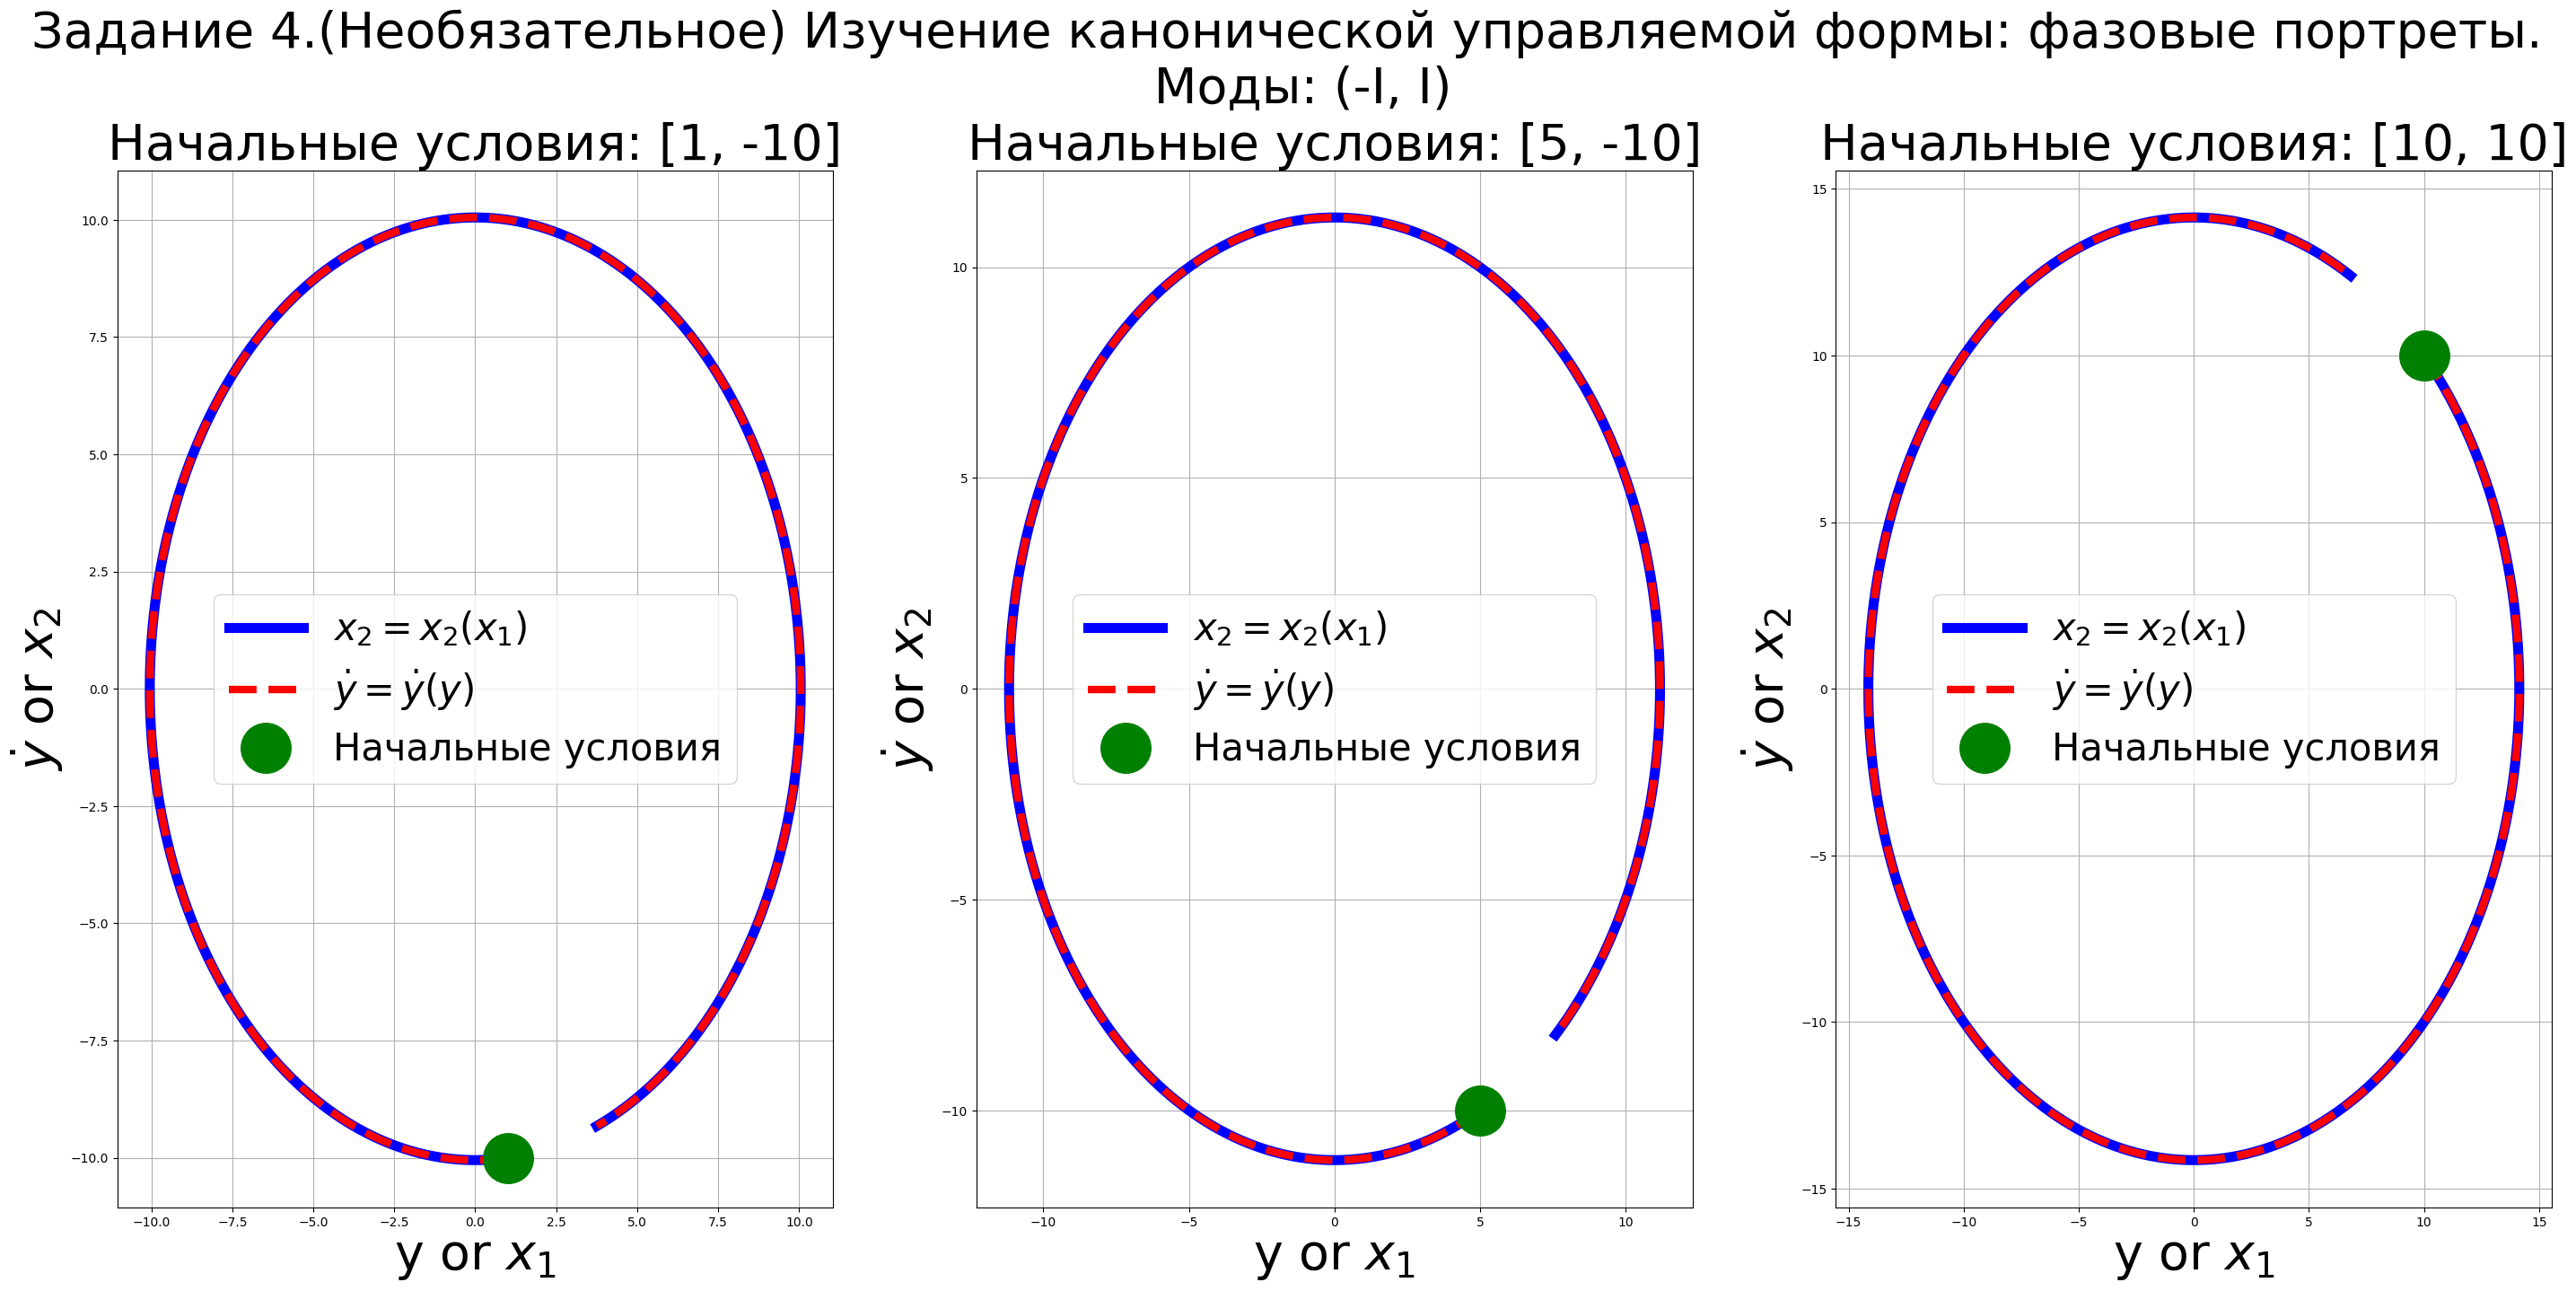

In [25]:
dt = 0.001 
max_t = 6
ts = np.linspace(0, max_t, int(max_t / dt))
task4_initial_1 = [[-10, 1], [-10, 5], [10, 10]]
task4_output(m60, m61, task4_initial_1, ts)